In [1]:
#Name: Sanket Manik Salunke 1001764897
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates #plot
%matplotlib inline
import sklearn.metrics as sm #accuracy and confusion matrix calculation
from itertools import cycle #for color values of scatter plot

In [2]:
df = pd.read_csv('iris.data',names=["sepal_length","sepal_width","petal_length","petal_width","target"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
var1=set(df['target'])

In [4]:
var1_sorted=sorted(var1)
var1_sorted

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [5]:
var1_mapped= dict([(y,x+1) for x,y in enumerate(var1_sorted)])
var1_mapped

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

In [6]:
y = df.target.replace(var1_mapped).values.reshape(len(df.axes[0]),1)
y = [list(i) for i in y]

In [7]:
df['target']=pd.factorize(df['target'].tolist())[0]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
Y = df['target']

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


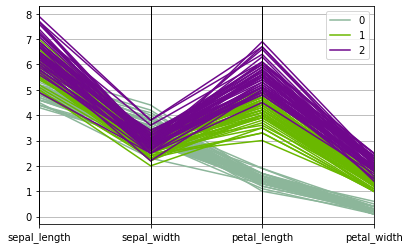

In [10]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.html

parallel_coordinates(df, 'target')

In [11]:
#converting dataframe to array
Y.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
#Reference: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
def cluster_ref(X, centroids):
    #list to add all distance values
    list_dist = []
    for i in centroids:
        #euclidean distance calculation
        d= np.sum(np.square(X - i), axis=1)
        d = np.sqrt(d)
        list_dist.append(d)
           
    d_array =np.array(list_dist)
    #indices of minimum element in an array of distance
    #Ref:https://www.geeksforgeeks.org/numpy-argmin-python/
    best = np.argmin(d_array, axis=0)
    return best

In [14]:
#kmeans algorithm for cluster calculation
def Kmeans_Cluster(X, k):
    initial_value = None
    No_of_iterations=1000
    #generate random centroid
    centroids = X.sample(k,random_state=1)
    centroids = centroids.to_numpy()
    for i in range(No_of_iterations):
#         i= i+1
        clusture_array = cluster_ref(X, centroids)
        centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            centroids[i] = np.mean(X[clusture_array==i], axis=0)
            centroids = centroids
        if initial_value is not None and np.all(initial_value == clusture_array):
            break
        else:
            initial_value = clusture_array
            
    return clusture_array
            

In [15]:
clusture_array= Kmeans_Cluster(X,3)

In [16]:
clusture_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [17]:
#calculate the wrongly assigned points
count=0
p=Y.to_numpy()
for i in range(len(clusture_array)):
    
    if(clusture_array[i]!=p[i]):
        count = count+1
print("number of points wrongly assigned:",count)  
# print(count) 

number of points wrongly assigned: 17


In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt#plot
from sklearn.decomposition import PCA

model = PCA(n_components=2,whiten=True,svd_solver='auto')
model=model.fit(X)
W = model.transform(X)


In [19]:
target_names=var1_sorted
target_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [20]:
target_ids= range(len(target_names))
target_ids

range(0, 3)

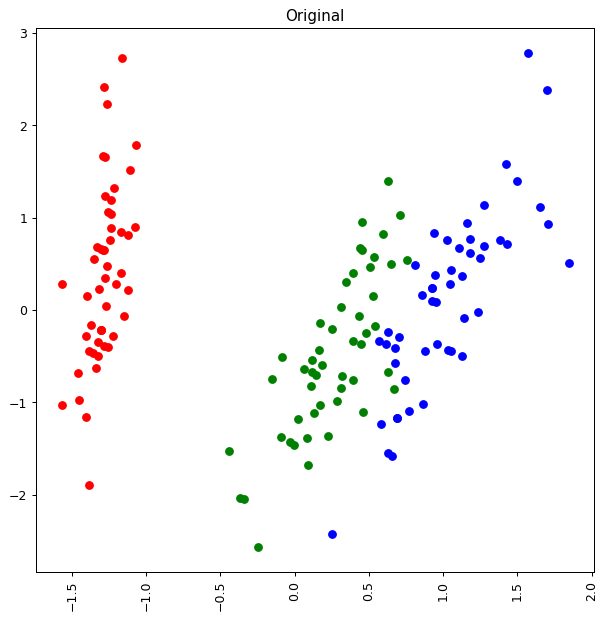

In [21]:
#https://www.youtube.com/watch?v=dyH27J_En8M
#scatter plot to check the actual and predicted clusters
colors=cycle('rgb')
plt.figure(figsize=(8, 8), dpi=90)
for i, c in zip(target_ids,colors):
    plt.scatter(W[Y==i,0],W[Y==i,1],c=c)
plt.xticks(rotation=90)
# plt.legend()
plt.title("Original")
plt.show()

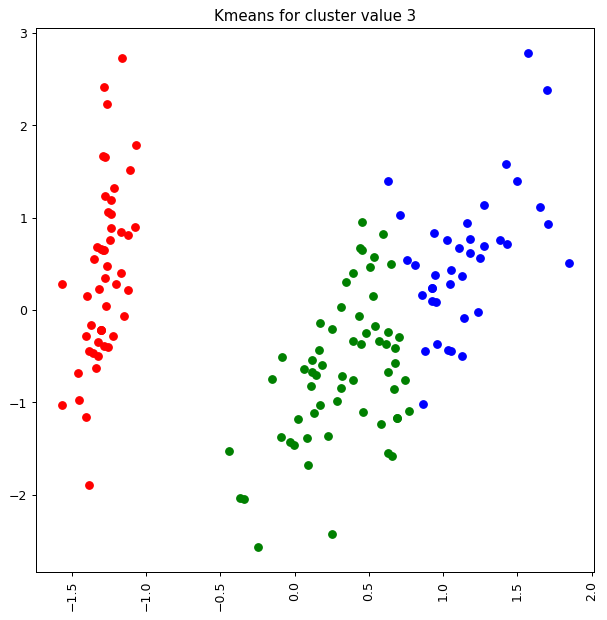

In [22]:
colors=cycle('rgb')
plt.figure(figsize=(8, 8), dpi=90)
for i, c in zip(target_ids,colors):
    plt.scatter(W[clusture_array==i,0],W[clusture_array==i,1],c=c)

plt.xticks(rotation=90)
plt.title("Kmeans for cluster value 3")
# plt.legend()
plt.show()

In [23]:

#Accuracy Calculation with Cluster Value 3
Accuracy = sm.accuracy_score(clusture_array, Y)
Accuracy= Accuracy*100 
print("Accuracy of our method is:",Accuracy,"%")

Accuracy of our method is: 88.66666666666667 %


In [24]:
error = 100-Accuracy
print("Error of our method is:",error,"%")

Error of our method is: 11.333333333333329 %


In [25]:
sm.confusion_matrix(clusture_array, Y)

array([[50,  0,  0],
       [ 0, 47, 14],
       [ 0,  3, 36]], dtype=int64)

In [26]:
#comparing values for cluster value 4 and cluster value 5
clusture_array1= Kmeans_Cluster(X,4)
clusture_array2=Kmeans_Cluster(X,5)

In [27]:
#checking wrongly assigned cluster with value 4
count1=0
from sklearn.cluster import KMeans
p=Y.to_numpy()
for i in range(len(clusture_array1)):
    
    if(clusture_array1[i]!=p[i]):
        count1 = count1+1
print("number of points wrongly assigned for cluster value 4:",count1)  

number of points wrongly assigned for cluster value 4: 50


In [28]:
#to select correct value of k
#taking range of k to choose k value
dist_points = []
K = range(1,10)
for no in K:
    kmodel = KMeans(n_clusters=no)
    kmodel.fit(X)
    dist_points.append(kmodel.inertia_)

In [29]:
#list of distance between point with respect to cluster centroid
dist_points

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.93873974358975,
 34.42194766505635,
 30.00336433172303,
 28.100978049728063]

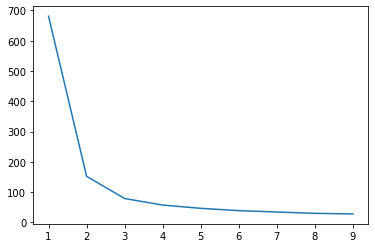

In [30]:
#plot for all the k values 
plt.plot(K, dist_points)

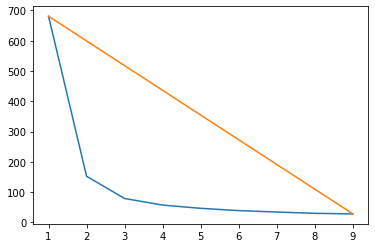

In [31]:
plt.plot(K, dist_points)
plt.plot([K[0], K[8]], [dist_points[0], dist_points[8]])
plt.show()